# Q)Take dataset from Kaggale and import the dataset and perform the data cleaning.In the data cleaning process, you have to remove irrelevant data, handle missing values, delete duplicate data, and filter out the outliers.You have to visualise the data using matplotlib, pandas, and the required library

# Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset

In [2]:
df=pd.read_csv("IPL Data Set.csv")

# Exploring the dataset



In [3]:
df

,mid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,21-05-2017,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,21-05-2017,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,21-05-2017,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,21-05-2017,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


In [4]:
df.dtypes

mid                 int64
date               object
venue              object
batting_team       object
bowling_team       object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

# Data Cleaning

### Removing unwanted columns • Keeping only consistent teams • Removing the first 5 overs data set in every match • Converting the column 'date' from string into datetime object

In [5]:
df.columns

Index(['mid', 'date', 'venue', 'batting_team', 'bowling_team', 'batsman',
       'bowler', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'striker', 'non-striker', 'total'],
      dtype='object')

In [6]:
# Removing unwanted columns and keeping the rows as it is 
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']

print('Before removing unwanted columns: {}'.format(df.shape))
df.drop(labels=columns_to_remove, axis=1, inplace=True)
print('After removing unwanted columns: {}'.format(df.shape))

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 9)


In [7]:
df.columns

Index(['date', 'batting_team', 'bowling_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [8]:
df

,date,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222
...,...,...,...,...,...,...,...,...,...
76009,21-05-2017,Mumbai Indians,Rising Pune Supergiant,121,7,19.2,40,0,129
76010,21-05-2017,Mumbai Indians,Rising Pune Supergiant,127,7,19.3,46,0,129
76011,21-05-2017,Mumbai Indians,Rising Pune Supergiant,128,7,19.4,47,0,129
76012,21-05-2017,Mumbai Indians,Rising Pune Supergiant,129,7,19.5,48,0,129


In [9]:
df['batting_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [10]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [11]:
# Keeping only consistent teams
print('Before removing inconsistent teams: {}'.format(df.shape))
df = df[(df['batting_team'].isin(consistent_teams)) & (df['bowling_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(df.shape))

Before removing inconsistent teams: (76014, 9)
After removing inconsistent teams: (53811, 9)


In [12]:
df['batting_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [13]:
# Removing the first 5 overs data in every match
print('Before removing first 5 overs data: {}'.format(df.shape))
df = df[df['overs']>=5.0]
print('After removing first 5 overs data: {}'.format(df.shape))

Before removing first 5 overs data: (53811, 9)
After removing first 5 overs data: (40108, 9)


In [14]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
print("Before converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))
print("After converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))


Before converting 'date' column from string to datetime object: <class 'str'>
After converting 'date' column from string to datetime object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [15]:
df

,date,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222
...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
75885,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
75886,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
75887,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107


# DATA VISUALIZATION

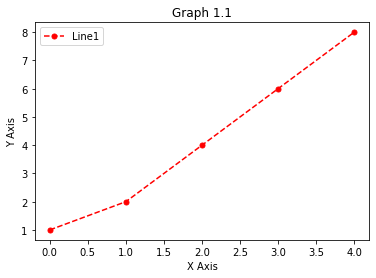

In [16]:
##basic graph without dataset

x=[0,1,2,3,4]
y=[1,2,4,6,8]

#plt.plot(x,y)

plt.plot(x,y, label='Line1',color='red',marker='.',markersize=10,linestyle='--')

plt.title('Graph 1.1')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

plt.legend()
plt.show()


In [19]:
##find the unique match ids
ipl = pd.read_csv('IPL Data Set.csv')
ipl
ipl.mid.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

Text(0, 0.5, 'Wickets')

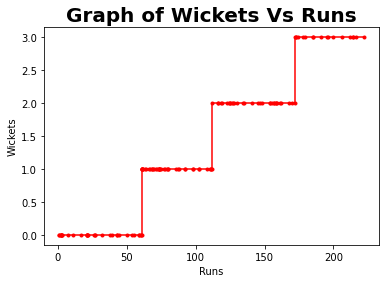

In [20]:
##for match 1

mid1 = ipl.loc[ipl['mid'] == 1]
mid1

runs1=mid1.runs
runs1
wickets1=mid1.wickets
wickets1

plt.plot(runs1,wickets1,label='Match 1', color='red', marker='.')

plt.title('Graph of Wickets Vs Runs',fontweight='bold',size=20)
plt.xlabel('Runs')
plt.ylabel('Wickets')


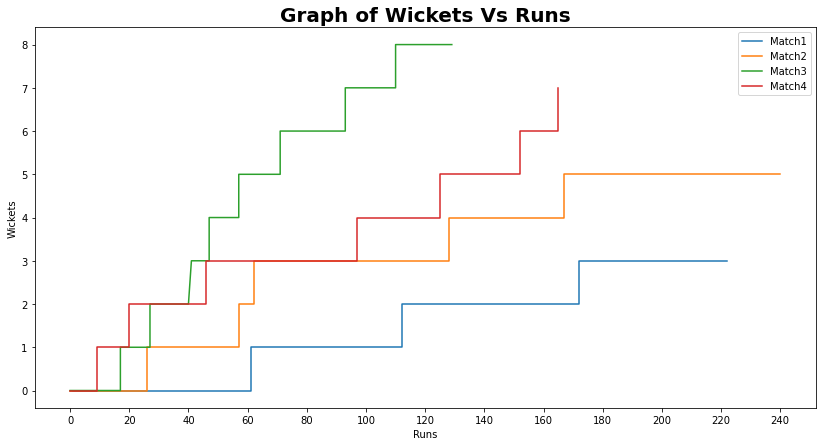

In [21]:
##for increasing the size of plot
plt.figure(figsize=(14,7))

##for more than 1 matches

for i in range(1,5):
           match = ipl.loc[ipl['mid']==i]
           plt.plot(match.runs, match.wickets,label= 'Match'+ str(i))
    
    
plt.title('Graph of Wickets Vs Runs',fontweight='bold',size=20)
plt.xlabel('Runs')
plt.ylabel('Wickets')

plt.xticks([0,20,40,60,80,100,120,140,160,180,200,220,240])
plt.legend()
plt.show()



In [22]:
##Seperating year from date in our IPL dataset

ipl['date'] = pd.to_datetime(ipl['date'], infer_datetime_format=True)
ipl['Year'] = pd.DatetimeIndex(ipl['date']).year
ipl.head(5)


,mid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,Year
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222,2008
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222,2008
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222,2008
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222,2008
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222,2008


In [23]:
years = np.array([2008,2009,2010,2011,2012])
type(years)

numpy.ndarray

In [24]:
##function

def total_runs(team):
    totalrunsArray=[]
    for i in range(len(years)):
            x=years[i]
            battings = team.loc[team['Year'] == x]
            totRuns=sum(battings.runs)
            totalrunsArray.append(totRuns) 
    return totalrunsArray       

In [25]:
#implementation of the function and selcting the two teams ie MI & CSK

team1 = ipl.loc[(ipl['batting_team'] == 'Mumbai Indians')]
team1
t1=total_runs(team1)
print(t1)

team2 = ipl.loc[(ipl['batting_team'] == 'Chennai Super Kings')]
team2
t2=total_runs(team2)
print(t2)


 

[56534, 68810, 112049, 70128, 50421]
[86606, 89877, 75297, 92590, 110419]


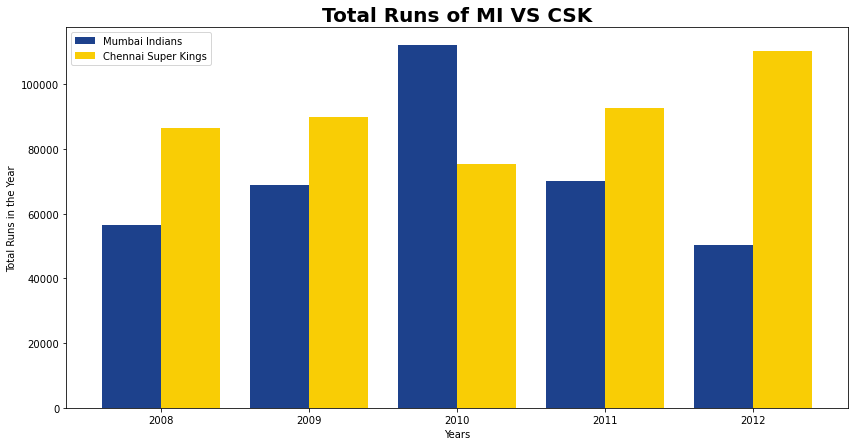

In [26]:
##plotting

plt.figure(figsize=(14,7))

width=0.4

plt.bar(years-0.2,t1,width,label='Mumbai Indians', color= '#1D418C')
plt.bar(years+0.2,t2,width,label= 'Chennai Super Kings', color= '#F9CD05')

plt.title('Total Runs of MI VS CSK',fontweight='bold',size=20)
plt.xlabel('Years')
plt.ylabel('Total Runs in the Year')
plt.legend()
plt.show()


In [27]:
##take unique value from ipl dataset
tot=ipl.total
target = tot.unique()
target

array([222, 240, 129, 165, 110, 166, 142, 208, 214, 182, 135, 147, 154,
       158, 178, 137, 191, 164, 196, 169, 162, 109, 126, 144, 103, 187,
       140, 122, 181, 204, 156, 143, 133, 221, 194,  67, 197, 189, 175,
       176, 211, 174, 145, 192, 112, 163, 101, 179, 184, 150, 168, 149,
       139, 119, 148, 141, 153, 105, 116, 157, 123, 173, 120, 160, 134,
       188, 170, 146, 161, 212, 190, 203, 218,  92, 185, 151, 171, 136,
       155, 183, 180, 177, 172, 246, 200, 159, 138, 111, 130, 132,  82,
        95,  81, 118, 195, 231,  94, 205, 125,  97, 232, 152, 198, 128,
       193, 115, 131, 124, 207, 100, 186, 114, 215,  99, 209, 117, 263,
        80, 223, 106,  70, 201, 226, 199, 127, 167, 235, 113, 202, 121,
        98, 227, 248, 206, 213, 230,  73, 107], dtype=int64)

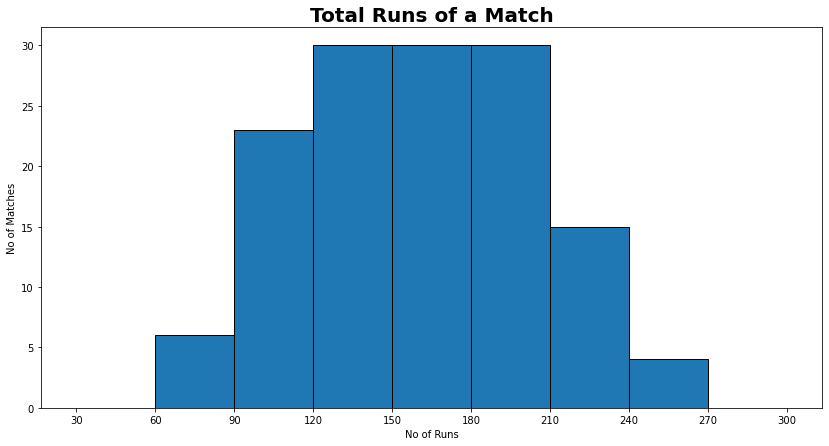

In [29]:
bins=[30,60,90,120,150,180,210,240,270,300]
plt.figure(figsize=(14,7))

#plt.hist(target,edgecolor='black')
plt.hist(target,bins,edgecolor='black')
         
##edgecolor to make histogram look more discrete and neat


plt.title('Total Runs of a Match',fontweight='bold',size=20)
plt.xlabel('No of Runs')
plt.ylabel('No of Matches')


plt.xticks(bins)
##plt.yticks([0,2,4,6,8,10,12,14,16,18,20])
plt.show()

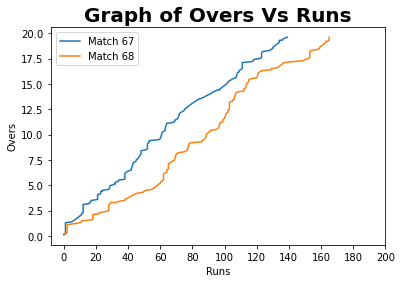

In [30]:
#Approach 1 USING IDEAL TECHNIQUE
#importing csv file

ipl=pd.read_csv("IPL Data Set.csv")
mid1 = ipl.loc[ipl['mid'] == 67]
mid2 = ipl.loc[ipl['mid'] == 68]

plt.plot(mid1.runs, mid1.overs,label='Match 67')
plt.plot(mid2.runs, mid2.overs,label='Match 68')

plt.title('Graph of Overs Vs Runs',fontweight='bold',size=20)
plt.xlabel('Runs')
plt.ylabel('Overs')
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.legend()
plt.show()

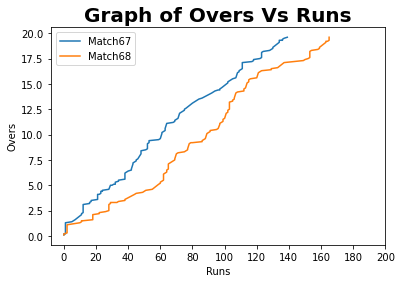

In [31]:
#Approach 2 using For loop


for i in range(67,69):
           match = ipl.loc[ipl['mid']==i]
           plt.plot(match.runs, match.overs,label= 'Match'+ str(i))
plt.title('Graph of Overs Vs Runs',fontweight='bold',size=20)
plt.xlabel('Runs')
plt.ylabel('Overs')
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.legend()
plt.show()